In [1]:
!pip install scikit-learn
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## EXERCISE 1: Search of the best C

Create a SVM with linear kernel using the scikit-learn library. 

Verify the performance with different values of the hyperparameter C using the function [logspace](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html), nel range -20:0:20. 

> __QUESTION 1(a):__  Check the best configuration of C, using the 3-fold cross-validation on the digits dataset. 

> __QUESTION 1(b):__ Plot the score achieved in each configuration, by showing the different values for C in the x-axis and CV score in y-axis. Suggestion: Use the log-scale.

> __QUESTION 1(c):__ Train and test the model with the best configuration found at the previous step


In [3]:
digits_data = datasets.load_digits()
#print(digits_data.data)
#print(np.unique(digits_data.target))
#print(digits_data.target.shape)
mean_digits_data={}
std_digits_data={}
n_samples = len(digits_data.images)
data = digits_data.images.reshape((n_samples, -1))
for k in np.logspace(-20,0,20):
  clf = svm.SVC(kernel='linear', C=k)
  scores = cross_val_score(clf, data, digits_data.target, cv=3) # the entire (flatten) dataset
  #print("C:",C)
  #print("Score: ",scores)
  #print("Mean: ", np.mean(scores))
  mean_digits_data[k]=np.mean(scores)
  #print("Std: ", np.std(scores))
  std_digits_data[k]=np.std(scores)
#print(std)

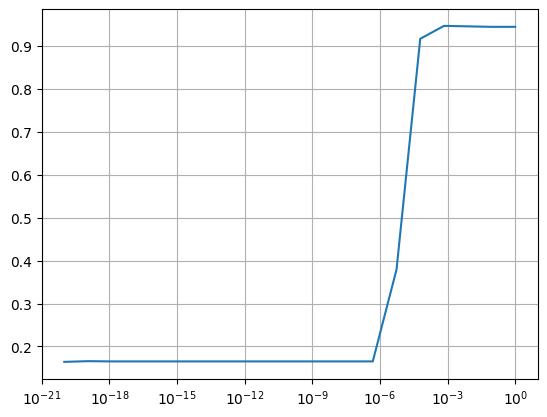

In [22]:
plt.plot(mean_digits_data.keys(),mean_digits_data.values())
plt.grid(True)
#plt.yscale('log')
plt.xscale('log')
plt.show()

In [9]:
max_c=max(mean_digits_data,key=mean_digits_data.get)
print(max_c)
print(mean_digits_data.values())

0.0006951927961775591
dict_values([0.16416249304396216, 0.16583194212576516, 0.16527545909849747, 0.16527545909849747, 0.16527545909849747, 0.16527545909849747, 0.16527545909849747, 0.16527545909849747, 0.16527545909849747, 0.16527545909849747, 0.16527545909849747, 0.16527545909849747, 0.16527545909849747, 0.16527545909849747, 0.3789649415692821, 0.9159710628825821, 0.9460211463550361, 0.9449081803005009, 0.9437952142459656, 0.9437952142459656])


<Figure size 640x480 with 0 Axes>

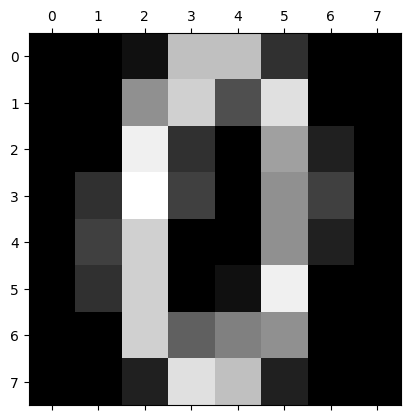

0
Classification report for classifier SVC(C=0.0006951927961775591, kernel='linear'):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.96      0.96      0.96        46
           2       1.00      1.00      1.00        43
           3       0.95      0.77      0.85        47
           4       0.96      0.94      0.95        48
           5       0.92      0.98      0.95        45
           6       0.98      0.98      0.98        47
           7       0.90      0.96      0.92        45
           8       0.78      0.88      0.83        41
           9       0.89      0.87      0.88        45

    accuracy                           0.93       450
   macro avg       0.93      0.93      0.93       450
weighted avg       0.93      0.93      0.93       450




In [10]:
#best is c=10^-17(max(mean,key=mean.get))
clf=svm.SVC(kernel='linear', C=max_c)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits_data.target, test_size=0.25, shuffle=False
)

clf.fit(X_train, y_train)
p=clf.predict(X_test)

id = 12
plt.gray()
plt.matshow(X_test[id].reshape(8,8))
plt.show()
print(p[id])

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, p)}\n"
)


## EXERCISE 2: SVM on the iris_dataset

Load the iris dataset from the dataset available at this [link](https://scikit-learn.org/stable/datasets/toy_dataset.html).

> __QUESTION 2(a):__  Verify the proprieties (number of samples, number of classes, etc.) of the dataset as we did during the lecture with the digit dataset. 

> __QUESTION 2(b):__ Split the dataset in training and test according to the following percentages: 70% - 30%

> __QUESTION 2(c):__ Train a SVM with different kernel (linear, rbf, polinomial) by leaving the default values for the hyperparameters

> __QUESTION 2(d):__ Test the achieved models on the test set

> __QUESTION 2(e):__ Represent the performances achieved for each kernel in the form of confusion matrix


In [14]:
iris_ds=datasets.load_iris()
#print(iris_ds)

print(len(iris_ds.data))
print(iris_ds.data.shape)
print(np.unique(iris_ds.target))
print(iris_ds.target.shape)

print('--------')
print(iris_ds.target[0])
print(iris_ds.target[49])
print(iris_ds.target[51])
#dataset=0 0 ....... 0 1 ...... 1 2 ...... 2

150
(150, 4)
[0 1 2]
(150,)
--------
0
0
1


In [15]:
data_iris=iris_ds.data.reshape((len(iris_ds.data),-1))

In [16]:
x_irisTrain,x_irisTest, y_irisTrain, y_irisTest=train_test_split(data_iris , iris_ds.target,test_size=0.30)

iris_linear=svm.SVC(kernel='linear')
iris_rbf=svm.SVC(kernel='rbf')
iris_polinomial=svm.SVC(kernel='poly')

In [17]:
iris_linear.fit(x_irisTrain,y_irisTrain)
iris_rbf.fit(x_irisTrain,y_irisTrain)
iris_polinomial.fit(x_irisTrain,y_irisTrain)

SVC(kernel='poly')

In [18]:
linear_iris_predicted=iris_linear.predict(x_irisTest)
rbf_iris_predicted=iris_rbf.predict(x_irisTest)
polinomial_iris_predicted=iris_polinomial.predict(x_irisTest)

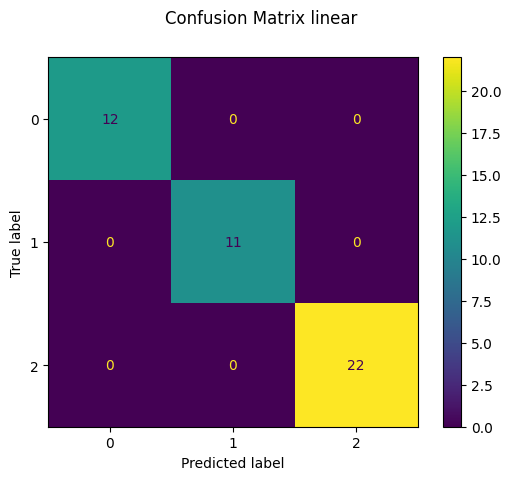

In [19]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_irisTest, linear_iris_predicted)
disp.figure_.suptitle("Confusion Matrix linear")
plt.show()

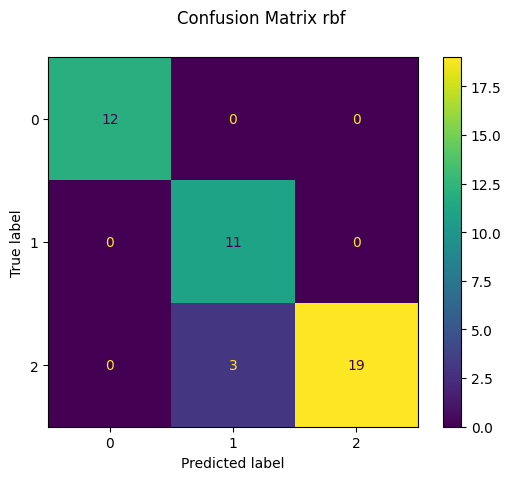

In [20]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_irisTest, rbf_iris_predicted)
disp.figure_.suptitle("Confusion Matrix rbf")
plt.show()

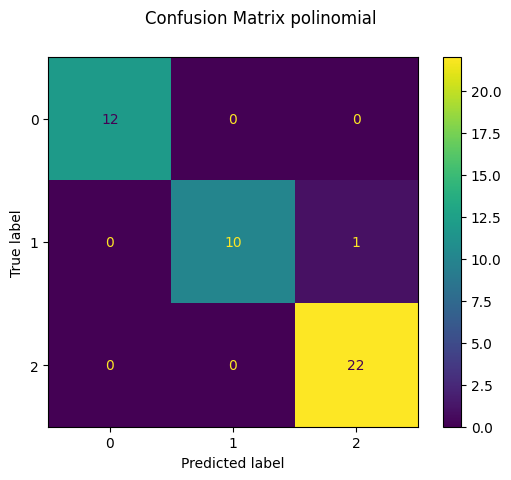

In [21]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_irisTest, polinomial_iris_predicted)
disp.figure_.suptitle("Confusion Matrix polinomial")
plt.show()